<a href="https://colab.research.google.com/github/Maratinhos/hw/blob/master/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import pandas as pd
%matplotlib inline

In [281]:
file = files.upload()

Saving kaggle.json to kaggle (1).json


In [282]:
!ls

 gender_submission.csv	 kaggle.json	       prediction.csv   test.csv
'kaggle (1).json'	 kaggle-titanic.hdf5   sample_data      train.csv


In [0]:
!mkdir ~/.kaggle

In [0]:
!mv kaggle.json ~/.kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 51.6MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.26MB/s]


In [0]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [379]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,1


In [0]:
df['Cabin2'] = pd.isnull(df['Cabin'])
df['Cabin2'] = df['Cabin2'].astype(int)

df_test['Cabin2'] = pd.isnull(df_test['Cabin'])
df_test['Cabin2'] = df_test['Cabin2'].astype(int)

In [0]:
df['Sex'] = df['Sex'].replace('male', 0)
df['Sex'] = df['Sex'].replace('female', 1)
df['Embarked'] = df['Embarked'].replace('S', 0)
df['Embarked'] = df['Embarked'].replace('C', 1)
df['Embarked'] = df['Embarked'].replace('Q', 2)

df_test['Sex'] = df_test['Sex'].replace('male', 0)
df_test['Sex'] = df_test['Sex'].replace('female', 1)
df_test['Embarked'] = df_test['Embarked'].replace('S', 0)
df_test['Embarked'] = df_test['Embarked'].replace('C', 1)
df_test['Embarked'] = df_test['Embarked'].replace('Q', 2)

In [0]:
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin2']]
y = df['Survived']

x_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin2']]

In [0]:
x = x.fillna(x.mean())

x_test = x_test.fillna(x_test.mean())

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1, shuffle=True)

In [0]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.fit_transform(x_val)

x_test_scaled = scaler.fit_transform(x_test)

In [0]:
x_train_scaled = x_train_scaled.astype(np.float32)
x_val_scaled = x_val_scaled.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

x_test_scaled = x_test_scaled.astype(np.float32)

In [0]:
x_train_scaled = np.array(x_train_scaled)
x_val_scaled = np.array(x_val_scaled)
y_train = np.array(y_train)
y_val = np.array(y_val)

x_test_scaled = np.array(x_test_scaled)

In [0]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    #BatchNormalization(),
    #Dropout(0.3),
    Dense(32, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    Dense(64, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    #Dense(512, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('kaggle-titanic.hdf5', monitor = 'val_acc', save_best_only = True, verbose = 1, mode = 'max')

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.8, min_lr = 0.01)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1, restore_best_weights = True)

In [402]:
history = model.fit(x_train_scaled, 
                    y_train, 
                    batch_size = 128,
                    validation_data = (x_val_scaled, y_val), 
                    epochs = 100,
                    verbose = 1,
                    callbacks = [checkpoint, learning_rate_reduction, early_stopping])

Train on 801 samples, validate on 90 samples
Epoch 1/100
128/801 [===>..........................] - ETA: 2s - loss: 0.6761 - acc: 0.6094
Epoch 00001: val_acc improved from -inf to 0.66667, saving model to kaggle-titanic.hdf5
801/801 [==============================] - 6s 8ms/sample - loss: 0.6476 - acc: 0.7079 - val_loss: 0.6136 - val_acc: 0.6667
Epoch 2/100
128/801 [===>..........................] - ETA: 0s - loss: 0.6098 - acc: 0.6719
Epoch 00002: val_acc did not improve from 0.66667
801/801 [==============================] - 0s 48us/sample - loss: 0.5903 - acc: 0.7166 - val_loss: 0.5809 - val_acc: 0.6667
Epoch 3/100
128/801 [===>..........................] - ETA: 0s - loss: 0.5815 - acc: 0.7031
Epoch 00003: val_acc improved from 0.66667 to 0.70000, saving model to kaggle-titanic.hdf5
801/801 [==============================] - 0s 68us/sample - loss: 0.5500 - acc: 0.7391 - val_loss: 0.5558 - val_acc: 0.7000
Epoch 4/100
128/801 [===>..........................] - ETA: 0s - loss: 0.6015 -

In [0]:
model.load_weights('kaggle-titanic.hdf5')

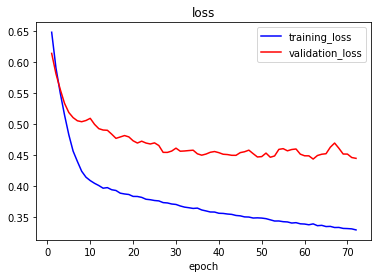

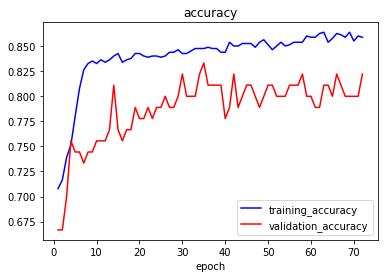

In [403]:
# Training plots
epochs = [i for i in range(1, len(history.history['loss'])+1)]

plt.plot(epochs, history.history['loss'], color='blue', label="training_loss")
plt.plot(epochs, history.history['val_loss'], color='red', label="validation_loss")
plt.legend(loc='best')
plt.title('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(epochs, history.history['acc'], color='blue', label="training_accuracy")
plt.plot(epochs, history.history['val_acc'], color='red',label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

In [0]:
y_pred = model.predict(x_test_scaled)
y_final = (y_pred > 0.5).astype(int).reshape(df_test.shape[0])
    
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_final})
output.to_csv('submission.csv', index=False)

In [405]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [406]:
output.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.368421
std,120.810458,0.482954
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [407]:
!kaggle competitions submit -c titanic -f submission.csv -m "sub #4"

100% 2.77k/2.77k [00:09<00:00, 284B/s]
Successfully submitted to Titanic: Machine Learning from Disaster